In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
# nr of words to consider as features
max_features = 10000
# cuts off texts aafter this many words(among the max_features most common words)
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequence
25000 test sequence
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.5868 - acc: 0.6840 - val_loss: 0.6081 - val_acc: 0.7028
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.3613 - acc: 0.8534 - val_loss: 0.4487 - val_acc: 0.8030
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.2741 - acc: 0.8942 - val_loss: 0.3621 - val_acc: 0.8586
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.2065 - acc: 0.9237 - val_loss: 0.4185 - val_acc: 0.8268
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.1544 - acc: 0.9455 - val_loss: 0.4023 - val_acc: 0.8514
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.1082 - acc: 0.9621 - val_loss: 0.5831 - val_acc: 0.7394
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.0895 - acc: 0.9687 - val_loss: 0.4

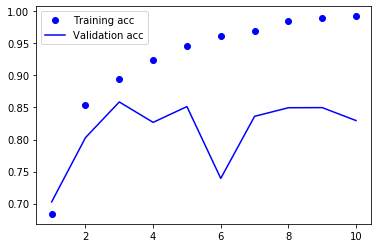

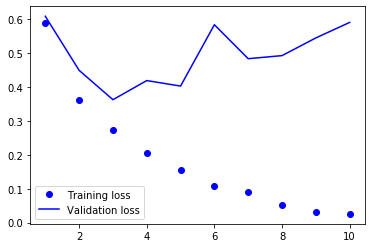

In [4]:
# plotting the result
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()